In [ ]:
import pandas as pd
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import files
SentimentAnalysis = files.upload()

Analysis = pd.read_csv('IMDB Dataset.csv')

Saving IMDB Dataset.csv to IMDB Dataset (1).csv


In [ ]:
Analysis.head()

,cleaned_text,sentiment_encoded
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\\S+|www\\S+", "", text)
    text = re.sub(r"@\\w+", "", text)
    text = re.sub(r"#\\w+", "", text)
    text = re.sub(r"\\d+", "", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text.strip()

In [ ]:
stopword = set(stopwords.words('english'))
def remove_stopword(text):
    words = text.split()
    cleaned_words = [w for w in words if w not in stopword]
    return ' '.join(cleaned_words)

In [ ]:
Analysis['cleaned_text'] = Analysis['review'].apply(clean_text).apply(remove_stopword)

In [ ]:
Analysis.head()

,sentiment,cleaned_text
0,positive,one reviewers mentioned watching 1 oz episode ...
1,positive,wonderful little production br br filming tech...
2,positive,thought wonderful way spend time hot summer we...
3,negative,basically theres family little boy jake thinks...
4,positive,petter matteis love time money visually stunni...


In [ ]:
Analysis.drop('review', axis=1, inplace=True)

In [ ]:
stemmer = PorterStemmer()

def stem_text(text):
    words = text.split()
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

Analysis['cleaned_text'] = Analysis['cleaned_text'].apply(stem_text)

In [ ]:
Analysis['cleaned_text'] = Analysis['cleaned_text'].apply(lambda x: ' '.join(x))

In [ ]:
Analysis.head()

,sentiment,cleaned_text
0,positive,one review mention watch 1 oz episod youll hoo...
1,positive,wonder littl product br br film techniqu unass...
2,positive,thought wonder way spend time hot summer weeke...
3,negative,basic there famili littl boy jake think there ...
4,positive,petter mattei love time money visual stun film...


In [ ]:
Analysis.drop(['sentiment'], axis=1, inplace=True)

In [ ]:
Analysis['sentiment_encoded'] = Analysis['sentiment'].map({'positive': 1, 'negative': 0})
display(Analysis.head())

In [ ]:
Analysis

,cleaned_text,sentiment_encoded
0,one review mention watch 1 oz episod youll hoo...,1
1,wonder littl product br br film techniqu unass...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic there famili littl boy jake think there ...,0
4,petter mattei love time money visual stun film...,1
...,...,...
49995,thought movi right good job wasnt creativ orig...,1
49996,bad plot bad dialogu bad act idiot direct anno...,0
49997,cathol taught parochi elementari school nun ta...,0
49998,im go disagre previou comment side maltin one ...,0


In [ ]:
X = Analysis['cleaned_text']
y = Analysis['sentiment_encoded']

In [ ]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100)

In [ ]:
X_extracted = vectorizer.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_extracted, y, test_size=0.3, random_state=42, stratify=y
)

In [ ]:
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print("\\n=== Classification Report ===\\n")
print(classification_report(y_test, y_pred))

\n=== Classification Report ===\n
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      7500
           1       0.75      0.74      0.74      7500

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



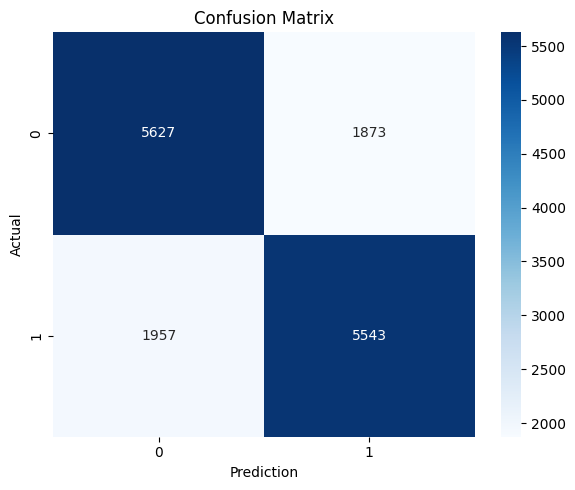

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:37:45] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


\n=== XGBoost Classification Report ===\n
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      7500
           1       0.73      0.74      0.74      7500

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



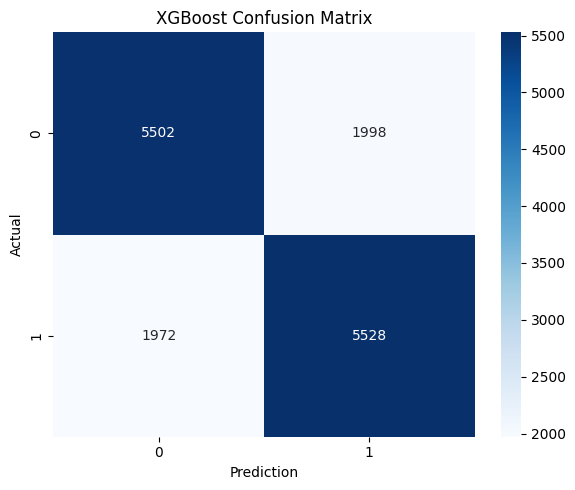

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

pred_xgb = xgb_model.predict(X_test)

print("\\n=== XGBoost Classification Report ===\\n")
print(classification_report(y_test, pred_xgb))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, pred_xgb)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues',
            xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.tight_layout()
plt.show()


=== Logistic Regression Classification Report ===

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      7500
           1       0.75      0.74      0.74      7500

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



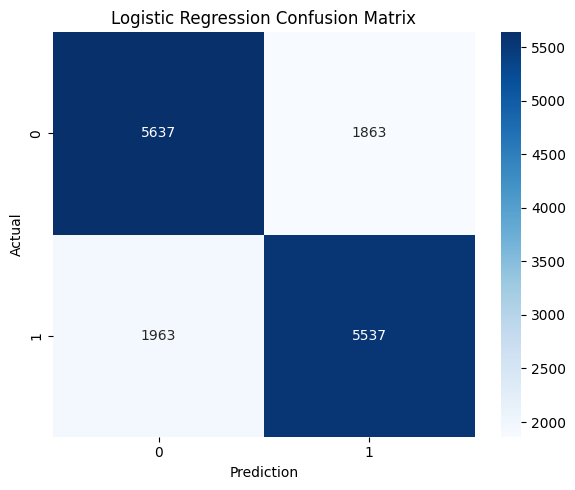

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("\n=== Logistic Regression Classification Report ===\n")
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=lr_model.classes_, yticklabels=lr_model.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

In [ ]:
lr_model_grid = LogisticRegression(max_iter=1000)
grid_search = GridSearchCV(lr_model_grid, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.1, 1, 10, 100], 'penalty': ['l2']},
             scoring='accuracy')

In [ ]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Best hyperparameters: {'C': 1, 'penalty': 'l2'}
Best cross-validation accuracy: 0.7450857142857144



=== Tuned Logistic Regression Classification Report ===

              precision    recall  f1-score   support

           0       0.74      0.75      0.75      7500
           1       0.75      0.74      0.74      7500

    accuracy                           0.74     15000
   macro avg       0.74      0.74      0.74     15000
weighted avg       0.74      0.74      0.74     15000



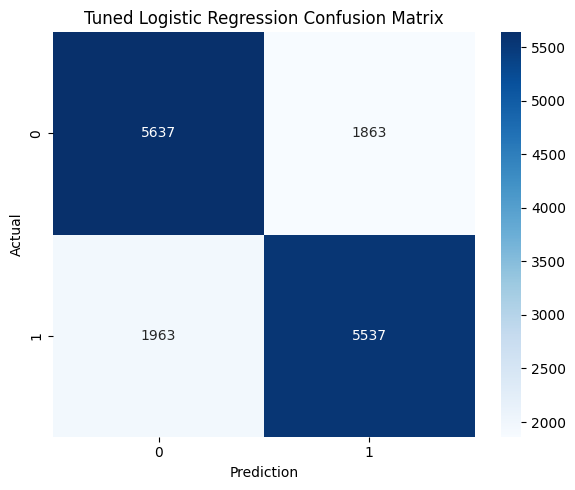

In [ ]:
best_lr_model = grid_search.best_estimator_
pred_grid = best_lr_model.predict(X_test)

print("\n=== Tuned Logistic Regression Classification Report ===\n")
print(classification_report(y_test, pred_grid))

cm_tuned = confusion_matrix(y_test, pred_grid)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_lr_model.classes_, yticklabels=best_lr_model.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.tight_layout()
plt.show()


=== Tuned Logistic Regression with New Features Classification Report ===

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      7500
           1       0.88      0.90      0.89      7500

    accuracy                           0.89     15000
   macro avg       0.89      0.89      0.89     15000
weighted avg       0.89      0.89      0.89     15000



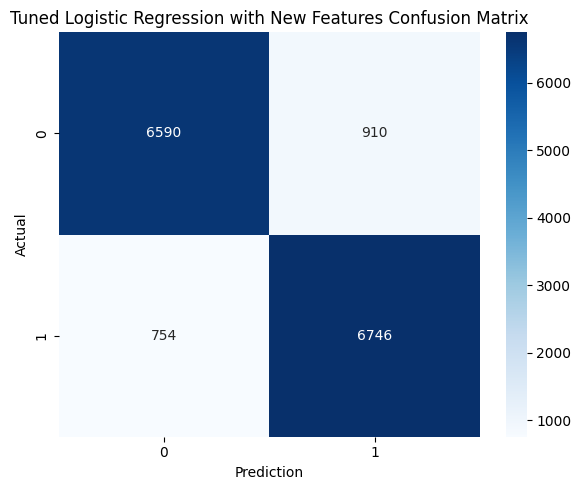

In [ ]:
X = Analysis['cleaned_text']
y = Analysis['sentiment_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# try different TF-IDF
vectorizer_tuned = TfidfVectorizer(ngram_range=(1, 3), max_features=5000)
X_train_new_features = vectorizer_tuned.fit_transform(X_train)
X_test_new_features = vectorizer_tuned.transform(X_test)

best_lr_model.fit(X_train_new_features, y_train)
y_pred_new_features = best_lr_model.predict(X_test_new_features)

print("\n=== Tuned Logistic Regression with New Features Classification Report ===\n")
print(classification_report(y_test, y_pred_new_features))

cm_new_features = confusion_matrix(y_test, y_pred_new_features)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_new_features, annot=True, fmt='d', cmap='Blues',
            xticklabels=best_lr_model.classes_, yticklabels=best_lr_model.classes_)
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Tuned Logistic Regression with New Features Confusion Matrix')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(best_lr_model, X_train_new_features, y_train, cv=5, scoring='accuracy')

print("\n=== Cross-validation Scores ===\n")
print(cv_scores)

print("\nMean cross-validation accuracy:", np.mean(cv_scores))
print("Standard deviation of cross-validation accuracy:", np.std(cv_scores))


=== Cross-validation Scores ===

[0.88957143 0.88       0.88857143 0.88585714 0.88685714]

Mean cross-validation accuracy: 0.8861714285714285
Standard deviation of cross-validation accuracy: 0.0033459082534965474


## Summary:

### Data Analysis Key Findings

*   Both Multinomial Naive Bayes and Logistic Regression models achieved an accuracy of 0.74 on the test set.
*   Hyperparameter tuning of the Logistic Regression model using Grid Search identified the best parameters as `{'C': 1, 'penalty': 'l2'}`, resulting in a best cross-validation accuracy of approximately 0.745 and a test accuracy of 0.74.
*   Using TF-IDF with an `ngram_range=(1, 3)` and `max_features=5000` for feature engineering, the tuned Logistic Regression model showed a mean cross-validation accuracy of approximately 0.8862 with a standard deviation of approximately 0.0033.
*   Analysis of misclassified instances (1664 in the test set) revealed potential error sources such as ambiguity, sarcasm, context dependency, lack of domain-specific knowledge, and complex sentence structures in the reviews.

### Insights or Next Steps

*   Investigate more advanced feature engineering techniques like word embeddings (Word2Vec, GloVe) to capture semantic relationships and potentially improve model performance, especially in handling nuances and context.
*   Explore more complex models such as Recurrent Neural Networks (RNNs) or Transformers, which are often better suited for capturing sequential dependencies and context in text data, potentially addressing some of the identified error patterns.
